## Lectura fitxer

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)

In [2]:
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)

In [3]:
X = df.drop('target', axis=1)
y = df['target']

## Aplicació model

### Utilització de totes les característiques

Fent 2 agrupacions per determinar si necessiten o no assistència médica

In [4]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X)

c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 264 with accuracies 
[1.70854125e-15 3.51108771e-05 8.78838510e-06]
not reaching the requested tolerance 1.3202428817749023e-05.
Use iteration 245 instead with accuracy 
6.7472538244876e-06.

  _, diffusion_map = lobpcg(
c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.77731860e-15 6.21259864e-06 1.40291631e-05]
not reaching the requested tolerance 1.3202428817749023e-05.
  _, diffusion_map = lobpcg(


In [6]:
df_clustered = X.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,0
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0


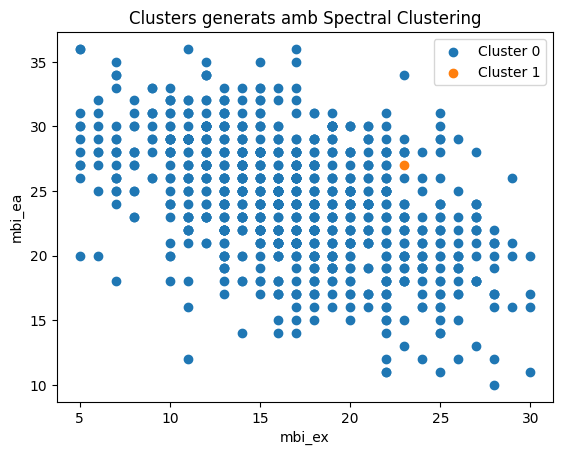

In [7]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points.iloc[:, 14], cluster_points.iloc[:, 16], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [8]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               age      year       sex      glang      part       job  \
cluster                                                                 
0        22.388701  3.105085  1.694915  14.241808  0.563842  0.349153   
1        18.000000  1.000000  2.000000  90.000000  0.000000  0.000000   

            stud_h    health      psyt       jspe   qcae_cog  qcae_aff  \
cluster                                                                  
0        25.277966  3.777401  0.224859  106.40339  58.550282  34.79661   
1        35.000000  4.000000  0.000000   81.00000  37.000000  24.00000   

              amsp  erec_mean     mbi_ex     mbi_cy    mbi_ea  
cluster                                                        
0        23.157062   0.719935  16.871186  10.082486  24.20452  
1        17.000000   0.904762  23.000000   7.000000  27.00000  


In [9]:
# Getting the number of patients in each cluster
cluster_grouped.size()

cluster
0    885
1      1
dtype: int64

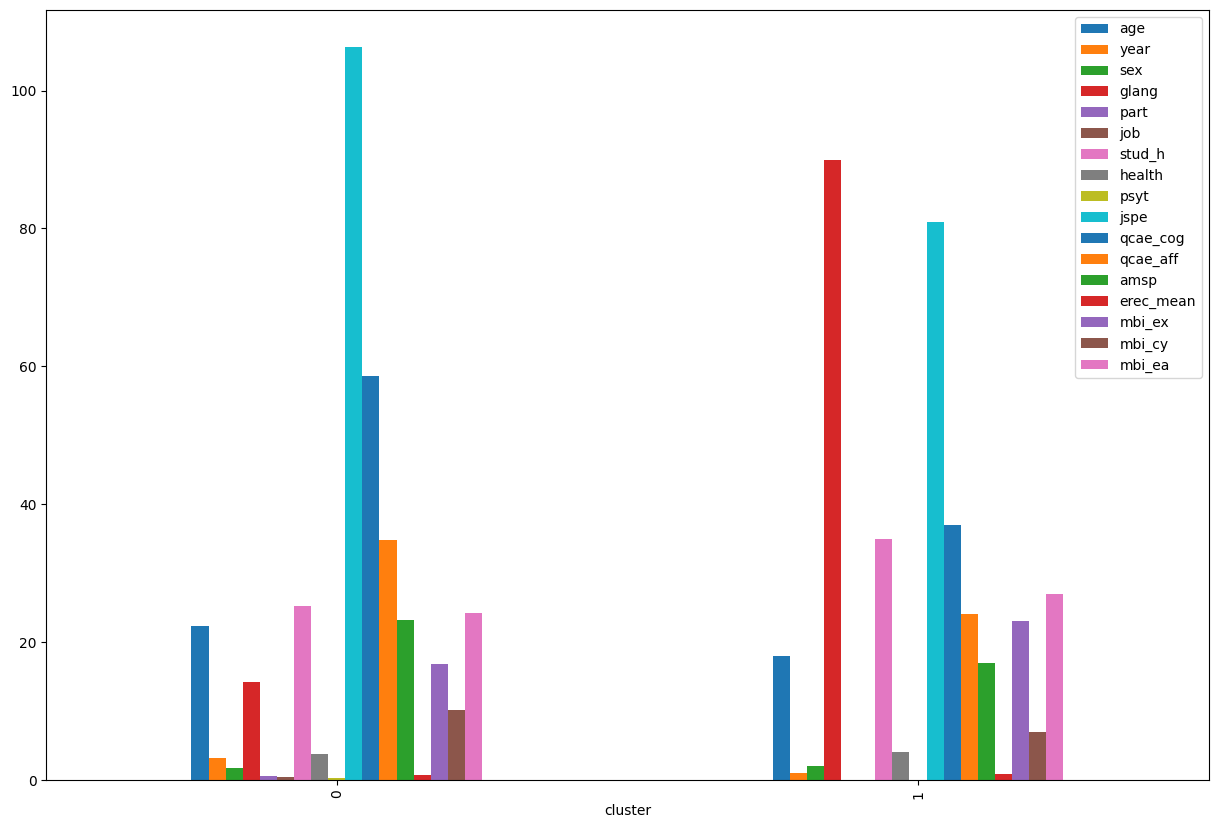

In [10]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

Com podem observar als resultats dels valors mitjans i de la gràfica, no podem concloure cap conclusió clara. Veiem que la columna que més varia d'una gràfica a una altra és la que pertany a la variable glang. Aquesta variable indica la llengua dels estudiants cosa que no considerem significativa.

## Avaluació Model

Definim un threshold per determinar a partir de quin punt considerem que la persona en qüestió pateix una enfermetat mental (ansietat o depressió). Tenint en compte que la nostra y=cesd+stai_t, és a dir la suma de escala de depressió i ansietat. Linterval d'aquestes dues és el següent:

* cesd: 0 - 56
* stai_t: 20 - 77

In [11]:
threshold = (56+77)*0.6
threshold

79.8

In [12]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,mbi_ex,mbi_cy,mbi_ea,cluster,target
0,18,1,1,120,1,0,56,3,0,88,62,27,17,0.738095,17,13,20,0,95
1,26,4,1,1,1,0,20,4,0,109,55,37,22,0.690476,14,11,26,0,40
2,21,3,2,1,0,0,36,3,0,106,64,39,17,0.690476,24,7,23,0,98
3,21,2,2,1,0,1,51,5,0,101,52,33,18,0.833333,16,10,21,0,65
4,21,3,1,1,1,0,22,4,0,102,58,28,21,0.690476,22,14,23,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106,63,39,28,0.619048,23,4,34,0,80
882,20,2,2,1,0,0,13,3,0,113,67,40,21,0.809524,17,5,24,0,67
883,19,1,1,1,0,0,50,5,0,100,50,31,24,0.547619,15,8,31,0,59
884,24,5,2,1,0,0,20,2,1,120,64,39,21,0.785714,22,15,19,0,91


In [13]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    178
1      1
dtype: int64


In [14]:
total_cluster = cluster_grouped.size()
total_cluster
print("\nRecompte estudiants totals en cluster\n", total_cluster)


Recompte estudiants totals en cluster
 cluster
0    885
1      1
dtype: int64


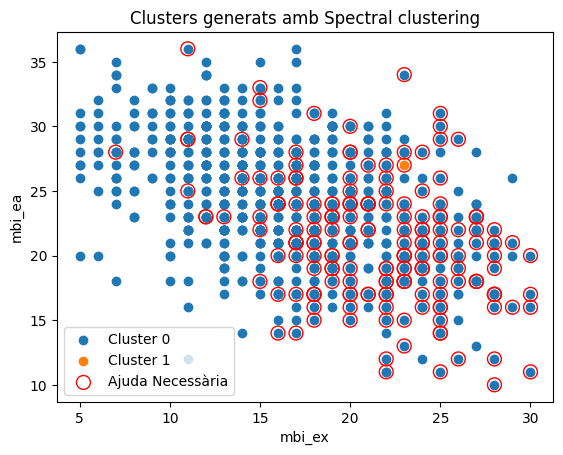

In [15]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral clustering')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

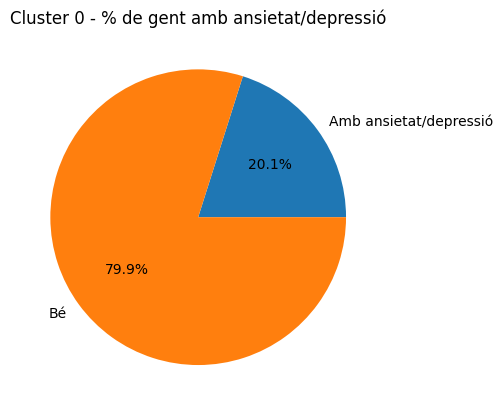

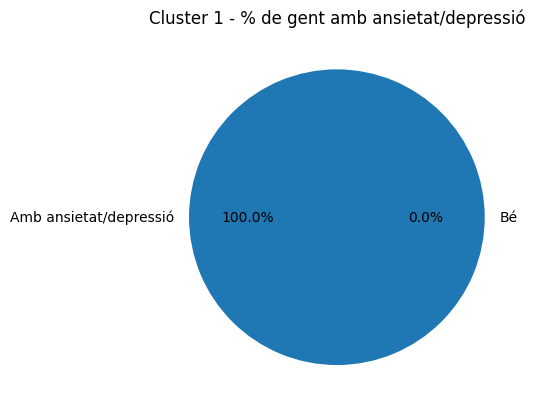

In [16]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Considerant que el cluster 1 és el que hauria de tenir estudiants amb ansietat/depressió i veient els diagrames. Observem que el clúster 1 té un resultat bastant semblant de casos de depressió/ansietat al clúster 0. Llavors, com podem observar, podem assegurar que no estem obtenint una bona agrupació.

### Utilització de les característiques més rellevants

Fent 2 agrupacions per determinar si necessiten o no assistència médica

#### Random forest

Recordem que els coeficients amb Random Forest dels diferents atributs eren:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |
| 1  | year      | 0.048998    |
| 7  | health    | 0.041126    |
| 3  | glang     | 0.027404    |
| 4  | part      | 0.026077    |
| 5  | job       | 0.022708    |
| 2  | sex       | 0.021316    |
| 8  | psyt      | 0.018066    |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.060000**

In [17]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [18]:
# X Random Forest
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff', 'mbi_ex', 'amsp', 'erec_mean', 'mbi_ea', 'mbi_cy', 'age']]

In [19]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [20]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_rf)

c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 342 with accuracies 
[1.86848845e-12 3.77772941e-05 1.16557478e-05]
not reaching the requested tolerance 1.3202428817749023e-05.
Use iteration 273 instead with accuracy 
7.625867371631621e-06.

  _, diffusion_map = lobpcg(
c:\Users\LAURA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[1.81507451e-12 7.44183012e-06 1.54357701e-05]
not reaching the requested tolerance 1.3202428817749023e-05.
  _, diffusion_map = lobpcg(


In [21]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster
0,88,62,56,27,17,17,0.738095,20,13,18,0
1,109,55,20,37,14,22,0.690476,26,11,26,0
2,106,64,36,39,24,17,0.690476,23,7,21,0
3,101,52,51,33,16,18,0.833333,21,10,21,0
4,102,58,22,28,22,21,0.690476,23,14,21,0


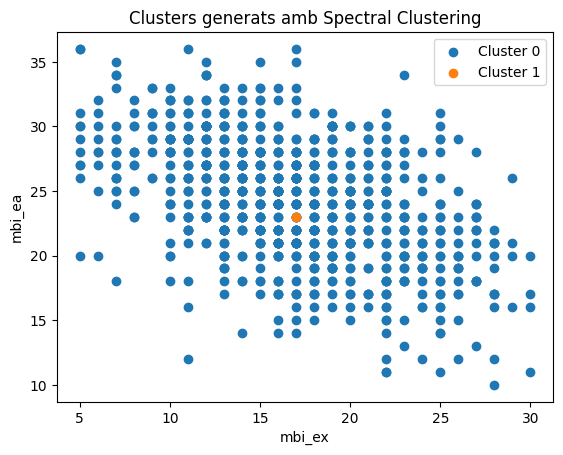

In [22]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [23]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h  qcae_aff     mbi_ex       amsp  \
cluster                                                                     
0        106.384181  58.532203  25.277966  34.79548  16.877966  23.153672   
1         98.000000  53.000000  35.000000  25.00000  17.000000  20.000000   

         erec_mean    mbi_ea     mbi_cy        age  
cluster                                             
0         0.720016  24.20904  10.080226  22.359322  
1         0.833333  23.00000   9.000000  44.000000  


In [24]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    885
1      1
dtype: int64

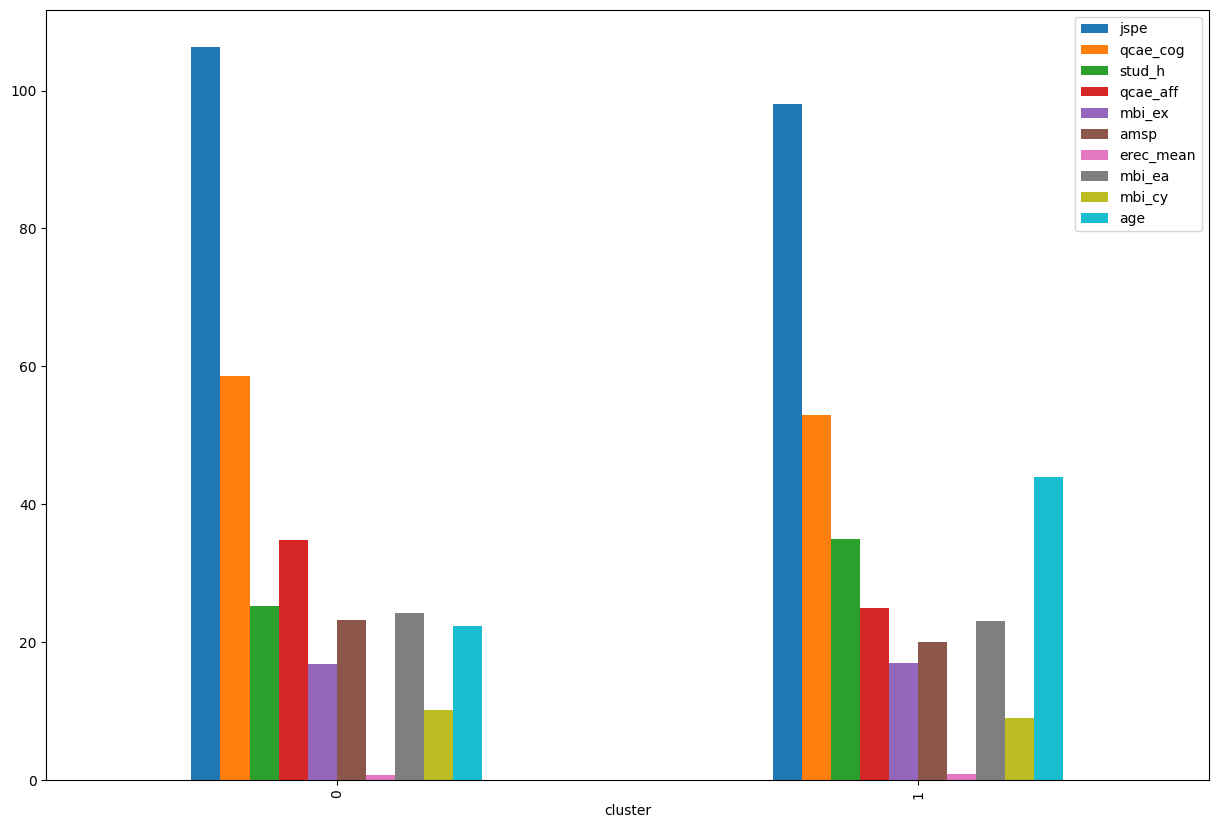

In [25]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

### Avaluació Model

In [26]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [27]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,mbi_ex,amsp,erec_mean,mbi_ea,mbi_cy,age,cluster,target
0,88,62,56,27,17,17,0.738095,20,13,18,0,95
1,109,55,20,37,14,22,0.690476,26,11,26,0,40
2,106,64,36,39,24,17,0.690476,23,7,21,0,98
3,101,52,51,33,16,18,0.833333,21,10,21,0,65
4,102,58,22,28,22,21,0.690476,23,14,21,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...
881,106,63,45,39,23,28,0.619048,34,4,21,0,80
882,113,67,13,40,17,21,0.809524,24,5,20,0,67
883,100,50,50,31,15,24,0.547619,31,8,19,0,59
884,120,64,20,39,22,21,0.785714,19,15,24,0,91


In [28]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    179
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    885
1      1
dtype: int64


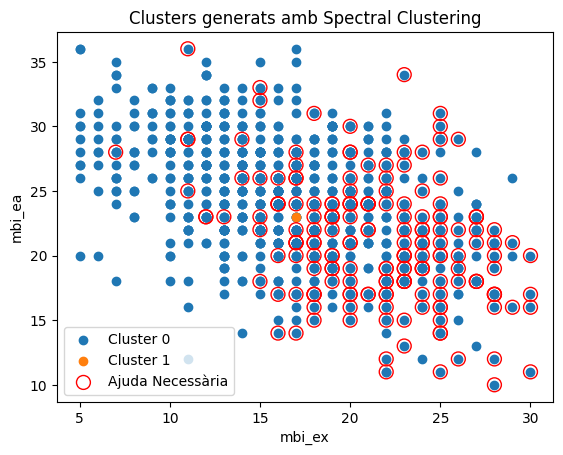

In [29]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_ea'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_ea'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_ea')
plt.legend()
plt.show()

In [30]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

KeyError: 1

**Conclusions**

Quan hem utilitzat totes les característiques hem presuposat que el cluster 1 és el que hauria de tenir els estudiants amb necessitat d'ajuda psicològica. Recordem que teníem:
* Cluster 0: 19.5%
* Cluster 1: 24.8%

Ara un cop reduïdes les característiques gràcies a Random Forest, les agrupacions obtingudes tenen una mica més de diferència pel que fa el percentatge de gent amb ansietat/depressió:
* Cluster 0: 15.2%
* Cluster 1: 25.9%

Notem que reduint les característiques hem obtingut una millora pel que fa l'agrupació. Així, tornem a reduir el nombre de caracterísitques.

#### Random forest II

Recordem que els coeficients amb Random Forest dels atributs que hem tingut en compte abans:

|    | atribut   | importancia |
|----|-----------|-------------|
| 9  | jspe      | 0.086444    |
| 10 | qcae_cog  | 0.084919    |
| 6  | stud_h    | 0.084754    |
| 11 | qcae_aff  | 0.082221    |
| 14 | mbi_ex    | 0.079569    |
| 12 | amsp      | 0.079371    |
| 13 | erec_mean | 0.078246    |
| 16 | mbi_ea    | 0.078138    |
| 15 | mbi_cy    | 0.073213    |
| 0  | age       | 0.067432    |

Ara agafarem els atributs amb importància major a **0.080000**

In [1]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [2]:
# X Random Forest II
X_rf = X[['jspe', 'qcae_cog', 'stud_h', 'qcae_aff']]

In [4]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [5]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_rf)

In [6]:
df_clustered = X_rf.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,jspe,qcae_cog,stud_h,qcae_aff,cluster
0,88,62,56,27,1
1,109,55,20,37,0
2,106,64,36,39,1
3,101,52,51,33,1
4,102,58,22,28,0


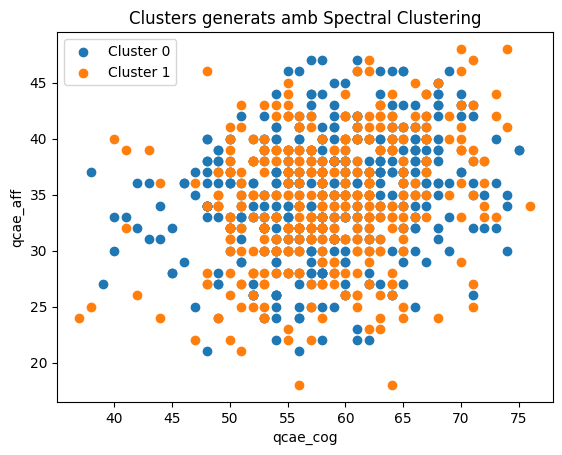

In [7]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

In [8]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

               jspe   qcae_cog     stud_h   qcae_aff
cluster                                             
0        107.567452  58.475375  12.698073  35.025696
1        105.045346  58.582339  39.322196  34.515513


In [9]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    467
1    419
dtype: int64

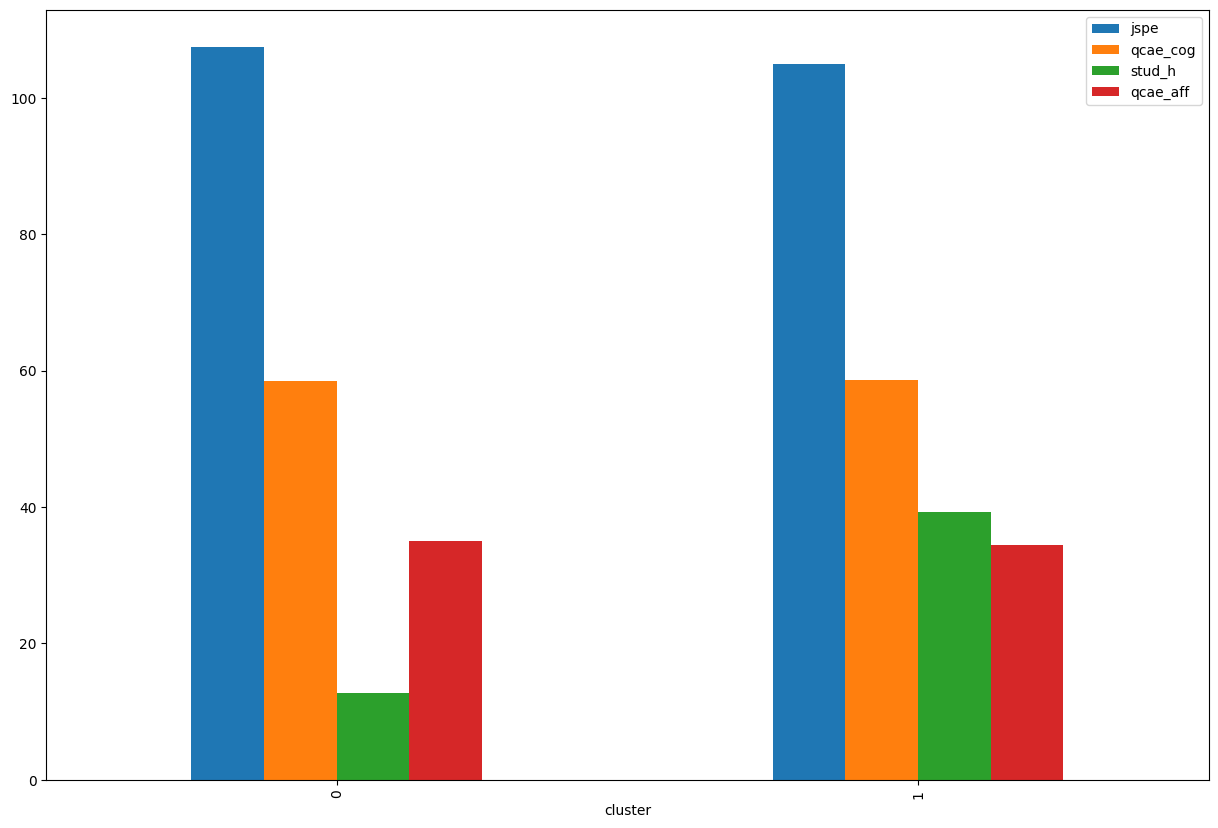

In [10]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Avaluació Model

In [11]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [12]:
# fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,jspe,qcae_cog,stud_h,qcae_aff,cluster,target
0,88,62,56,27,1,95
1,109,55,20,37,0,40
2,106,64,36,39,1,98
3,101,52,51,33,1,65
4,102,58,22,28,0,60
...,...,...,...,...,...,...
881,106,63,45,39,1,80
882,113,67,13,40,0,67
883,100,50,50,31,1,59
884,120,64,20,39,0,91


In [13]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     72
1    107
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    467
1    419
dtype: int64


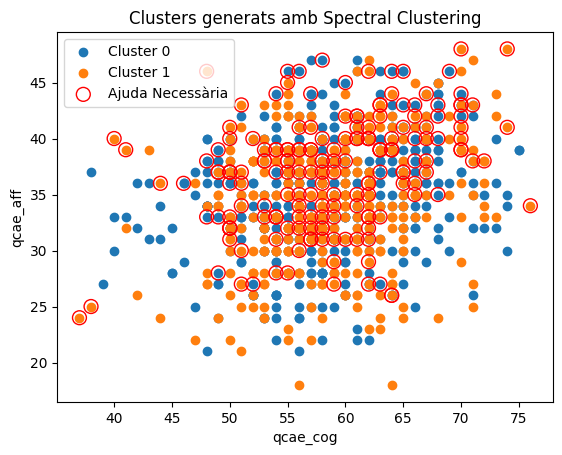

In [15]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['qcae_cog'], cluster_points['qcae_aff'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['qcae_cog'], df_target_gt_threshold['qcae_aff'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('qcae_cog')
plt.ylabel('qcae_aff')
plt.legend()
plt.show()

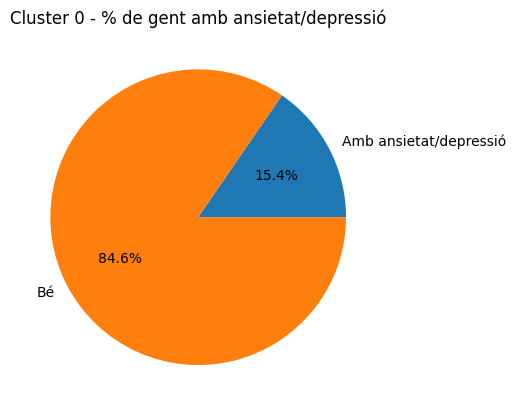

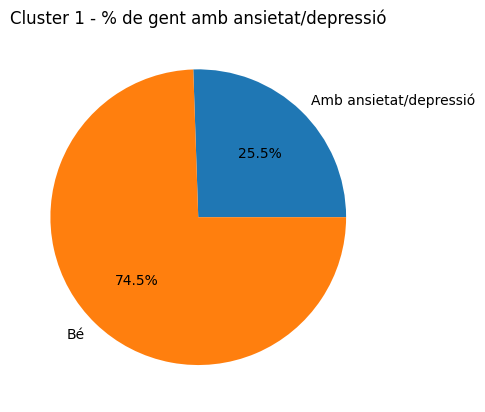

In [16]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

Quan hem reduït les característiques gràcies a Random Forest, els prcentatges de les agrupacions obtingudes eren:
* Cluster 0: 15.2%
* Cluster 1: 25.9%

Fent una altra reducció de característiques (fixant-nos amb la importància donada per Random Forest), obtenim:
* Cluster 0: 15.4%
* Cluster 1: 25.5%

Notem que no hem obtingut cap millora. Per tant, continuem provant altres mètodes per triar la rellevància de les característiques.

### Linear Regression

Ara en comptes de fer la reducció de característiques amb Random Forest, utilitzem els coeficients obtinguts després d'haver aplicat Linear Regression. 

Recordem que els coeficients amb Linear Regression dels diferents atributs eren:
|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |
| 3  | glang     | 0.052498    |
| 10 | qcae_cog  | -0.039671   |
| 9  | jspe      | -0.168637   |
| 12 | amsp      | -0.382934   |
| 16 | mbi_ea    | -1.007413   |
| 1  | year      | -1.074211   |
| 5  | job       | -1.184904   |
| 4  | part      | -1.968074   |
| 7  | health    | -3.010553   |

Per fer aquesta part ens quedarem els atributs que tenen l'importància major a **0.100000**

In [31]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [32]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex', 'qcae_aff', 'age', 'mbi_cy', 'stud_h']]

In [33]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [34]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_lr)

In [35]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster
0,0,1,0.738095,17,27,18,13,56,0
1,0,1,0.690476,14,37,26,11,20,0
2,0,2,0.690476,24,39,21,7,36,0
3,0,2,0.833333,16,33,21,10,51,0
4,0,1,0.690476,22,28,21,14,22,0


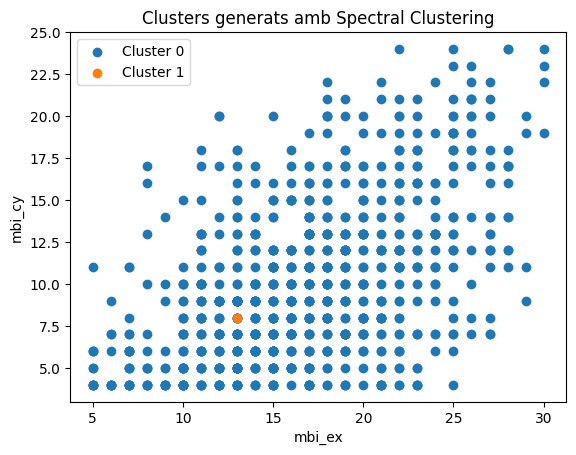

In [36]:

# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [37]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex   qcae_aff        age  \
cluster                                                                   
0        0.224859  1.694915   0.720070  16.882486  34.779661  22.366102   
1        0.000000  2.000000   0.785714  13.000000  39.000000  38.000000   

            mbi_cy     stud_h  
cluster                        
0        10.081356  25.255367  
1         8.000000  55.000000  


In [38]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    885
1      1
dtype: int64

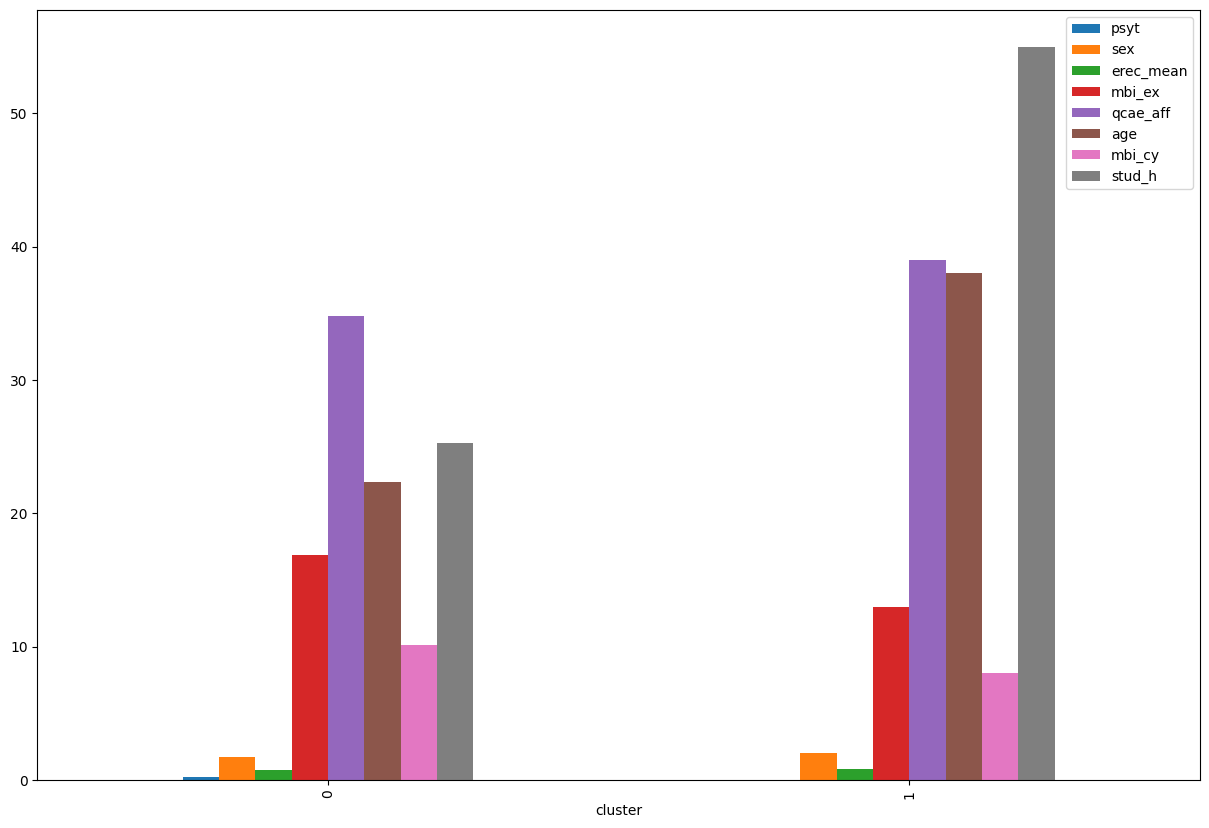

In [39]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Avaluació Model

In [40]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [41]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,qcae_aff,age,mbi_cy,stud_h,cluster,target
0,0,1,0.738095,17,27,18,13,56,0,95
1,0,1,0.690476,14,37,26,11,20,0,40
2,0,2,0.690476,24,39,21,7,36,0,98
3,0,2,0.833333,16,33,21,10,51,0,65
4,0,1,0.690476,22,28,21,14,22,0,60
...,...,...,...,...,...,...,...,...,...,...
881,0,1,0.619048,23,39,21,4,45,0,80
882,0,2,0.809524,17,40,20,5,13,0,67
883,0,1,0.547619,15,31,19,8,50,0,59
884,1,2,0.785714,22,39,24,15,20,0,91


In [42]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0    179
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    885
1      1
dtype: int64


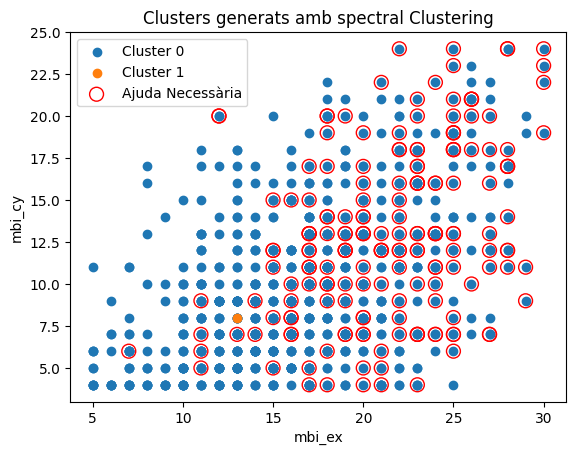

In [43]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['mbi_cy'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['mbi_cy'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('mbi_cy')
plt.legend()
plt.show()

In [44]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

KeyError: 1

**Conclusions**

Quan hem reduït les característiques segons els coeficients de Random Forest, les agrupacions obtingudes tenien  el percentatge de gent amb ansietat/depressió:
* Cluster 0: 15.2%
* Cluster 1: 25.9%

Ara que hem tret certes característiques seguint els coeficients de la Regressió lineal, tenim:
* Cluster 0: 25.4%
* Cluster 1: 16.2%

Podem dir que no tenim una gran millora, és cert que el cluster 0 (abans 1) és el cluster que té més estudiants amb ansietat o depressió, però dosminueix una mica la proporció: de 25.9% a 25.4%

Com no veiem cap tendència de millora del nostre model, procedirem a tenir en compte menys característiques (amb el cirteri dels coeficients de Linear Regression).

#### Linear Regression II

Recordem que els coeficients amb Linear Regression dels atributs que hem tingut en compte abans:

|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |
| 11 | qcae_aff  | 0.742631    |
| 0  | age       | 0.380706    |
| 15 | mbi_cy    | 0.224846    |
| 6  | stud_h    | 0.124795    |

Ara ens quedarem els atributs que tenen l'importància major a **1.000000**

In [45]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [46]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [47]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [48]:
n_clusters = 2  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_lr)

In [49]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,0
1,0,1,0.690476,14,0
2,0,2,0.690476,24,1
3,0,2,0.833333,16,0
4,0,1,0.690476,22,1


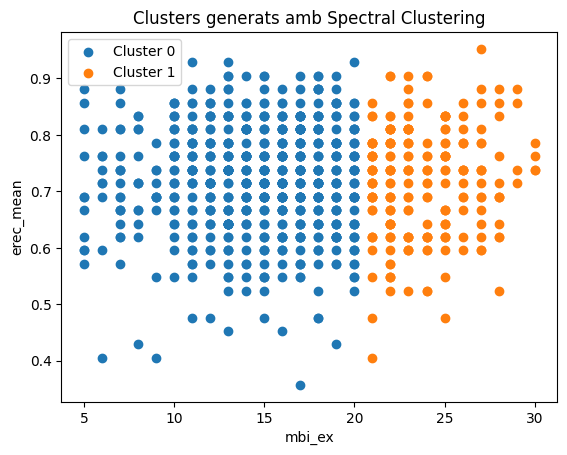

In [50]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [51]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.194903  1.667166   0.720461  14.583208
1        0.315068  1.780822   0.719178  23.867580


In [52]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    667
1    219
dtype: int64

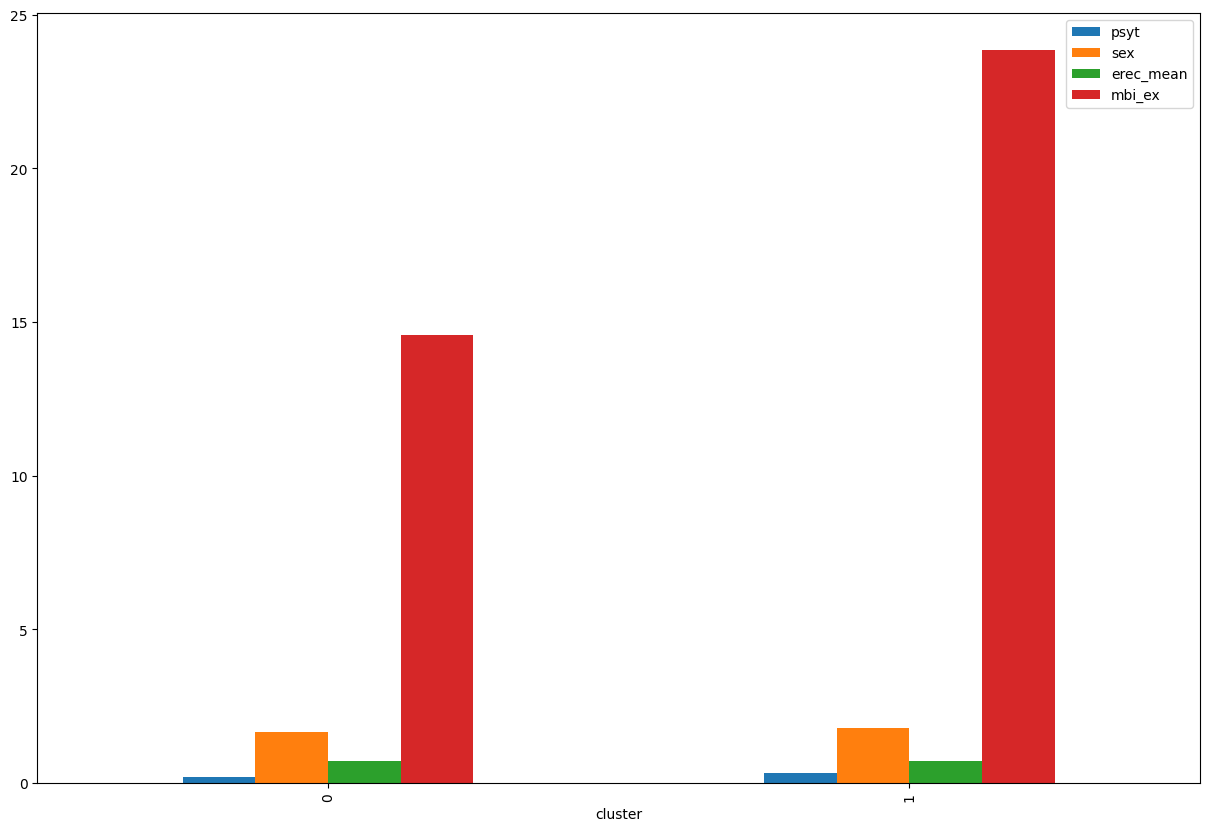

In [53]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

In [54]:
cesd_max = 56
stai_t_max = 77
threshold = (cesd_max+stai_t_max)*0.6
threshold

79.8

In [55]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,0,95
1,0,1,0.690476,14,0,40
2,0,2,0.690476,24,1,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,1,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,1,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,0,59
884,1,2,0.785714,22,1,91


In [56]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold = df_aval[df_aval['target'] > threshold]

# Fem el recompte agrupant per 'cluster'
count_by_cluster = df_target_gt_threshold.groupby('cluster').size()

# Mostrem el resultat
print("Recompte estudiants que necessiten ajuda\n", count_by_cluster)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que necessiten ajuda
 cluster
0     76
1    103
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    667
1    219
dtype: int64


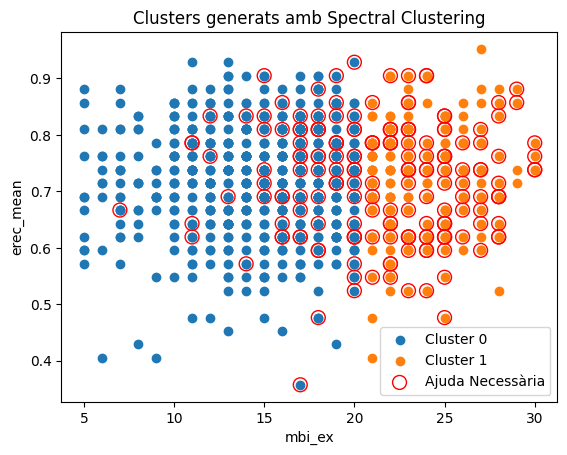

In [57]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold['mbi_ex'], df_target_gt_threshold['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

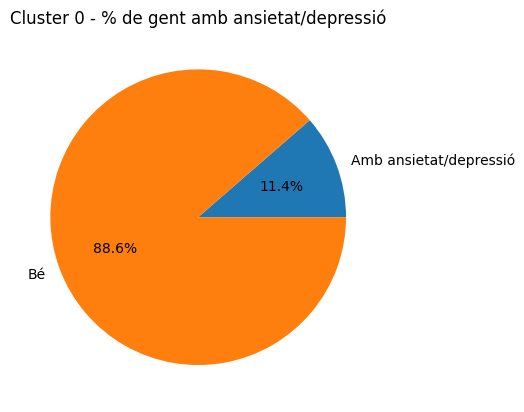

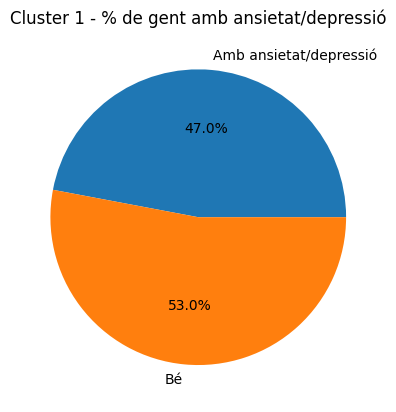

In [59]:
labels = 'Amb ansietat/depressió', 'Bé'
dades = []
for c in range(n_clusters):
    resta = total_cluster[c] - count_by_cluster[c]
    dades.append([count_by_cluster[c], resta])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Quan hem reduït les característiques seguint els coeficients de la Regressió lineal, quedant-nos aquelles que són superiors a 0.1, teniem:
* Cluster 0: 25.4%
* Cluster 1: 16.2%

I amb el mateix procés, però amb les característiques amb coeficients majors a 1 obtenim:
* Cluster 0: 34.6%
* Cluster 1: 6.4%

Podem observar bastanta millora. Però com ja hem redüit les característiques molts cops, ara en comptes de seguir reduïnt mirarem a veure que passa si clusteritzem amb més grups.

### Utilització de les característiques rellevants

Com a característiques rellevants fem servir aquelles que tenen coeficient major a **1.000000**

|    | Feature   | Coefficient |
|----|-----------|-------------|
| 8  | psyt      | 7.979258    |
| 2  | sex       | 4.281193    |
| 13 | erec_mean | 2.110597    |
| 14 | mbi_ex    | 1.319494    |


Fent 3 agrupacions per determinar si:
* necessiten assitència mèdica
* recomanable tenir assitència mèdica
* no necessiten assitència mèdica  

In [60]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [61]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [62]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [63]:
n_clusters = 3  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_lr)

In [64]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 
df_clustered.head(5) 

,psyt,sex,erec_mean,mbi_ex,cluster
0,0,1,0.738095,17,0
1,0,1,0.690476,14,0
2,0,2,0.690476,24,2
3,0,2,0.833333,16,0
4,0,1,0.690476,22,2


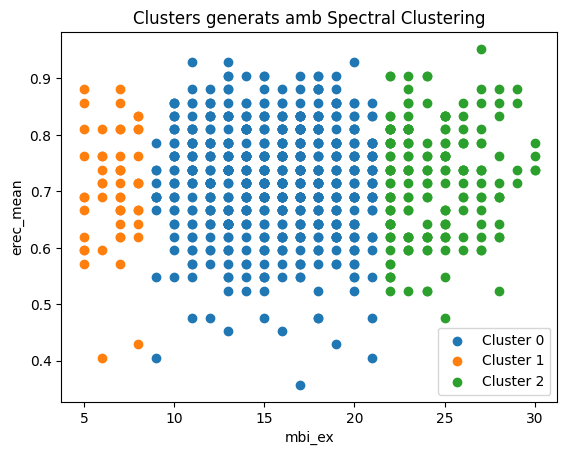

In [65]:
# Plot dels punts amb diferents colors segons el cluster al qual pertanyen
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

In [66]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.208589  1.685583   0.720859  15.558282
1        0.117647  1.509804   0.706349   6.647059
2        0.311475  1.781421   0.721442  24.431694


In [67]:
# Getting the number of patients in each cluster
total_cluster = cluster_grouped.size()
total_cluster

cluster
0    652
1     51
2    183
dtype: int64

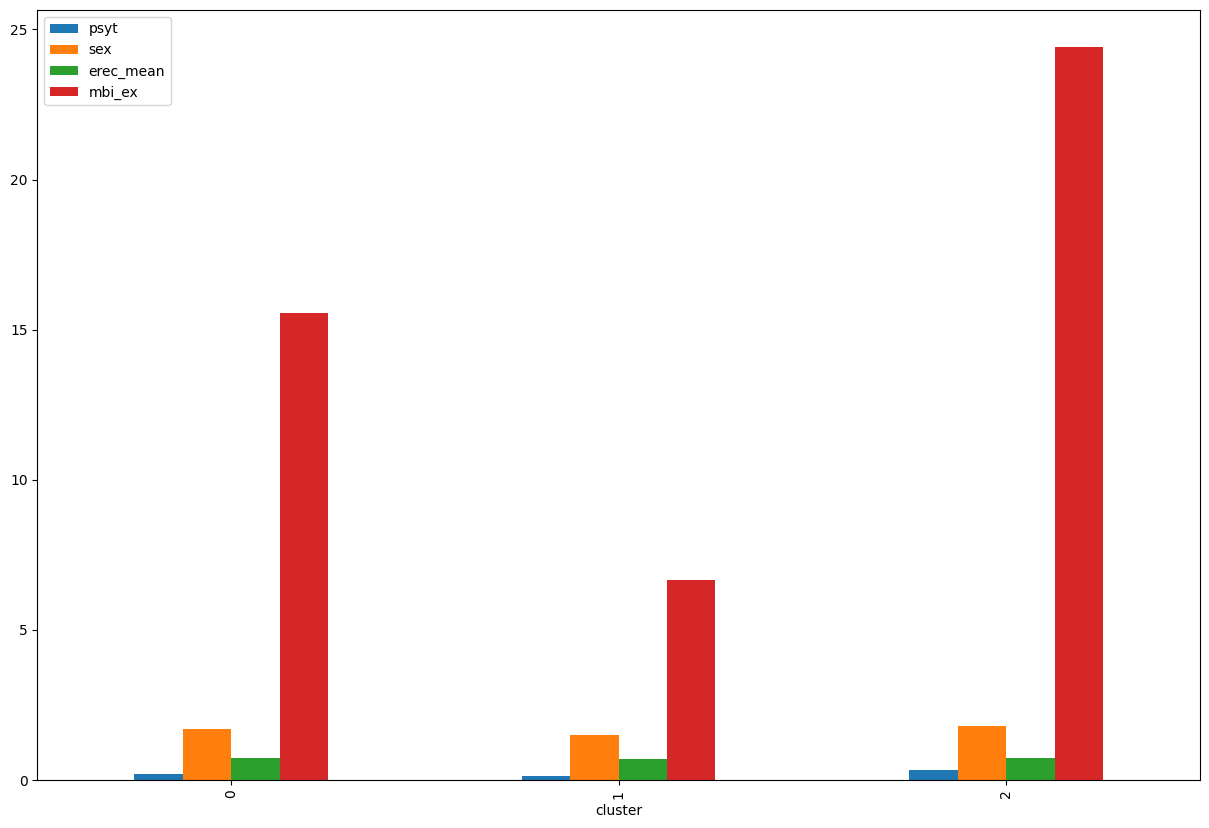

In [68]:
cluster_properties.plot(kind='bar', figsize=(15, 10))
plt.show()

#### Avaluació Model

In [69]:
cesd_max = 56
stai_t_max = 77
threshold1 = (cesd_max+stai_t_max)*0.33
print("threshold1", threshold1)
threshold2 = (cesd_max+stai_t_max)*0.66
print("threshold2", threshold2)

threshold1 43.89
threshold2 87.78


In [70]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,0,95
1,0,1,0.690476,14,0,40
2,0,2,0.690476,24,2,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,2,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,2,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,0,59
884,1,2,0.785714,22,2,91


In [71]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0    160
1     41
2      8
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0    446
1     10
2    109
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0    46
2    66
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    652
1     51
2    183
dtype: int64


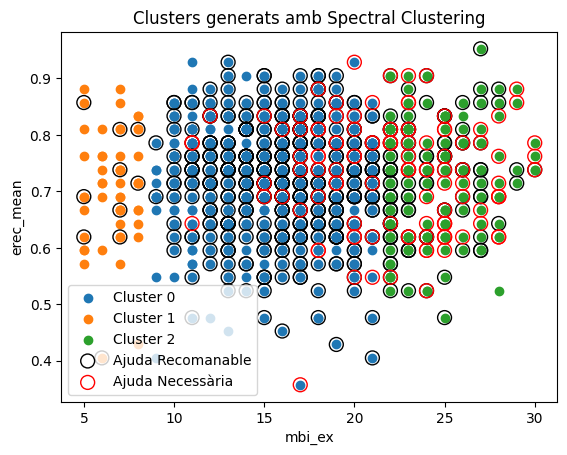

In [72]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['erec_mean'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Spectral Clustering')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

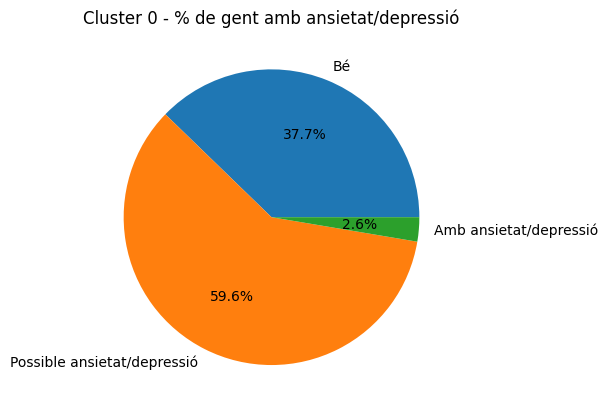

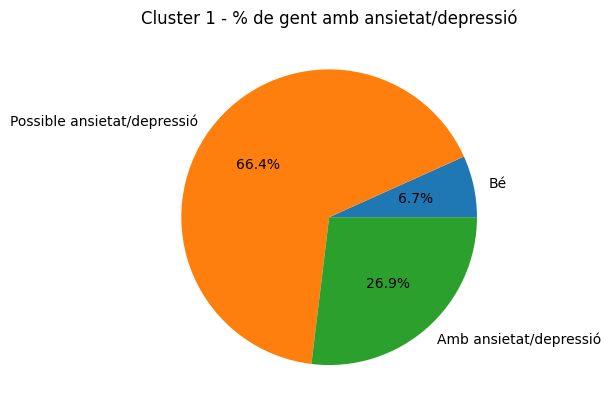

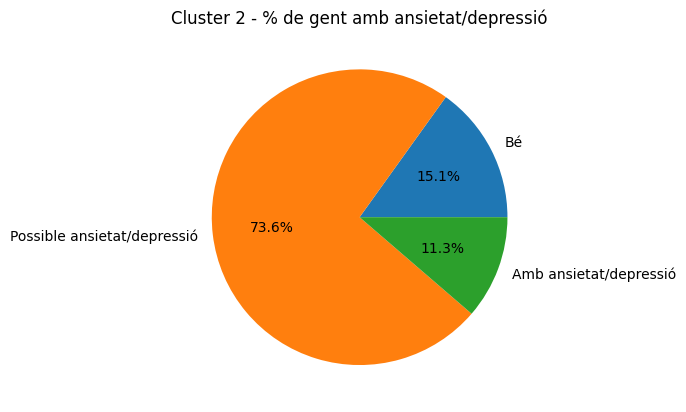

In [35]:
labels = 'Bé', 'Possible ansietat/depressió', 'Amb ansietat/depressió'
dades = []
for c in range(n_clusters):
    dades.append([count_by_cluster1[c], count_by_cluster2[c], count_by_cluster3[c]])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()

**Conclusions**

Recordem que quan hem treballat amb dos clusters i amb les característiques amb els coeficients calculats amb Linear Regression:
* Cluster 0: 34.6%
* Cluster 1: 6.4%

Ara treballant amb 3 clusters:

|  Cluster  | bé   | possible depressió/ansietat | depressió/ansietat |
|----|-----------| ---------------|-------------|
| 0  | 37.7%  | 59.6% | 2.6%    | 
| 1  |6.7%      | 66.4% | 26.9%    |
| 2  | 15.1%    | 73.6% | 11.3%    |

Veient aquests resultats podem, no amb gaire certesa, dir que el clúster 1 té tendència a tenir depressió o ansietat. Mentre que el cluster 0 sembla que tingui més proporció d'estudiants amb persones sanes, psicològicament.


Ara veurem que passa si canviem el thresholds.

#### Canvi thresholds

In [73]:
import pandas as pd

df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis = 1)
df['target'] = df['stai_t'] + df['cesd']
df = df.drop(['stai_t', 'cesd'], axis=1)
X = df.drop('target', axis=1)
y = df['target']

In [74]:
# X Linear Regression
X_lr = X[['psyt', 'sex', 'erec_mean', 'mbi_ex']]

In [75]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

In [76]:
n_clusters = 3  # Ajustar el número deseado de clusters
model_sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
clusters = model_sc.fit_predict(X_lr)

In [77]:
df_clustered = X_lr.copy() 
df_clustered['cluster'] = clusters 

In [78]:
# Grouping the data frame by cluster to get the properties of each cluster
cluster_grouped = df_clustered.groupby('cluster')
cluster_properties = cluster_grouped.mean()

# Printing the properties of each cluster (mean values of the variables)
print(cluster_properties)

total_cluster = cluster_grouped.size()

             psyt       sex  erec_mean     mbi_ex
cluster                                          
0        0.208589  1.685583   0.720859  15.558282
1        0.117647  1.509804   0.706349   6.647059
2        0.311475  1.781421   0.721442  24.431694


In [79]:
#Fem Dataset per avaluar el model 
df_aval = df_clustered.copy() 
df_aval['target'] = y
df_aval

,psyt,sex,erec_mean,mbi_ex,cluster,target
0,0,1,0.738095,17,0,95
1,0,1,0.690476,14,0,40
2,0,2,0.690476,24,2,98
3,0,2,0.833333,16,0,65
4,0,1,0.690476,22,2,60
...,...,...,...,...,...,...
881,0,1,0.619048,23,2,80
882,0,2,0.809524,17,0,67
883,0,1,0.547619,15,0,59
884,1,2,0.785714,22,2,91


In [80]:
cesd_max = 56
stai_t_max = 77
threshold1 = (cesd_max+stai_t_max)*0.55
print("threshold1", threshold1)
threshold2 = (cesd_max+stai_t_max)*0.85
print("threshold2", threshold2)

threshold1 73.15
threshold2 113.05


In [81]:
# Filtrem les files amb 'target' superior a threshold
df_target_gt_threshold1 = df_aval[df_aval['target'] < threshold1]
df_target_gt_threshold2 = df_aval[(df_aval['target'] > threshold1) & (df_aval['target'] < threshold2)]
df_target_gt_threshold3 = df_aval[df_aval['target'] > threshold2]

# Fem el recompte agrupant per 'cluster'
count_by_cluster1 = df_target_gt_threshold1.groupby('cluster').size()
count_by_cluster2 = df_target_gt_threshold2.groupby('cluster').size()
count_by_cluster3 = df_target_gt_threshold3.groupby('cluster').size()

# Mostrem els resultats
print("Recompte estudiants que NO necessiten ajuda\n", count_by_cluster1)
print("\nRecompte estudiants recomanable rebre ajuda\n", count_by_cluster2)
print("\nRecompte estudiants que SÍ necessiten ajuda\n", count_by_cluster3)

print("\nRecompte estudiants totals en cluster\n", total_cluster)

Recompte estudiants que NO necessiten ajuda
 cluster
0    532
1     50
2     70
dtype: int64

Recompte estudiants recomanable rebre ajuda
 cluster
0    118
1      1
2    103
dtype: int64

Recompte estudiants que SÍ necessiten ajuda
 cluster
0     2
2    10
dtype: int64

Recompte estudiants totals en cluster
 cluster
0    652
1     51
2    183
dtype: int64


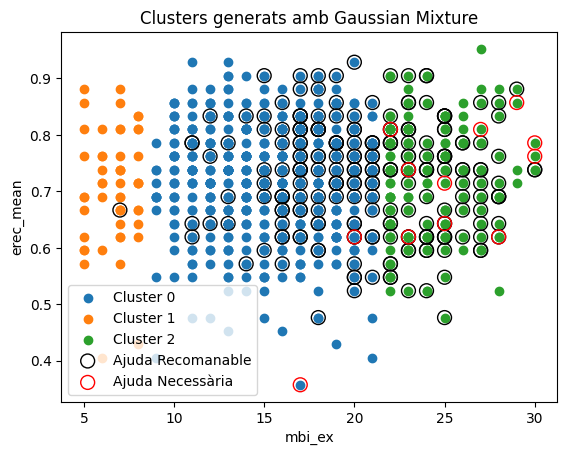

In [82]:
for i in range(n_clusters):
    cluster_points = df_clustered[df_clustered['cluster'] == i]
    plt.scatter(cluster_points['mbi_ex'], cluster_points['erec_mean'], label=f'Cluster {i}')

# Plot dels punts que superen el llindar amb marques diferents (per exemple, cercles buits)
plt.scatter(df_target_gt_threshold2['mbi_ex'], df_target_gt_threshold2['erec_mean'], label='Ajuda Recomanable', facecolors='none', edgecolors='black', marker='o', s=100)
plt.scatter(df_target_gt_threshold3['mbi_ex'], df_target_gt_threshold3['erec_mean'], label='Ajuda Necessària', facecolors='none', edgecolors='r', marker='o', s=100)

plt.title('Clusters generats amb Gaussian Mixture')
plt.xlabel('mbi_ex')
plt.ylabel('erec_mean')
plt.legend()
plt.show()

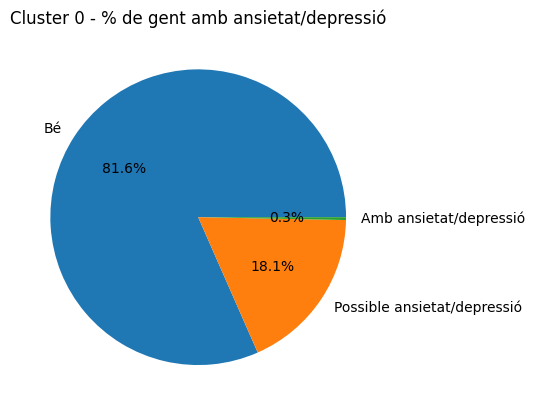

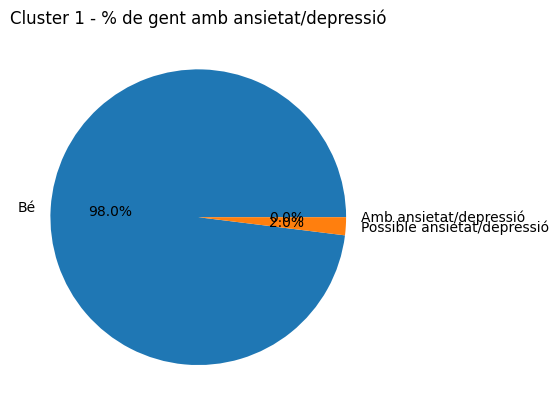

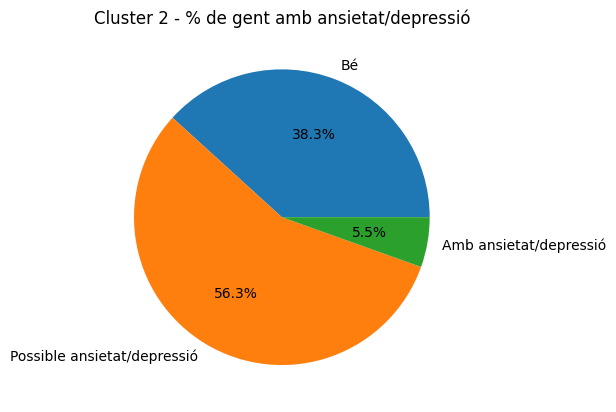

In [83]:
import matplotlib.pyplot as plt

labels = 'Bé', 'Possible ansietat/depressió', 'Amb ansietat/depressió'
dades = []

for c in range(n_clusters):
    count1 = count_by_cluster1.get(c, 0)
    count2 = count_by_cluster2.get(c, 0)
    count3 = count_by_cluster3.get(c, 0)
    dades.append([count1, count2, count3])

for i, d in enumerate(dades):
    fig, ax = plt.subplots()
    ax.pie(d, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Cluster {i} - % de gent amb ansietat/depressió')
    plt.show()


**Conclusions**

Abans treballant amb
* threshold1 = 43.89 
* threshold2 = 87.78

|  Cluster  | bé   | possible depressió/ansietat | depressió/ansietat |
|----|-----------| ---------------|-------------|
| 0  | 37.7%  | 59.6% | 2.6%    | 
| 1  |6.7%      | 66.4% | 26.9%    |
| 2  | 15.1%    | 73.6% | 11.3%    |

Ara amb:
* threshold1 = 73.15 
* threshold2 113.05

|  Cluster  | bé  | possible depressió/ansietat | depressió/ansietat  |
|----|-----------| ---------------|-------------|
| 0  | 90.7%  | 9.3% | 0.0%    |
| 1  | 50.8%   | 45.9% | 3.4%    |
| 2  | 70.8%      | 28.3% | 0.9%    |


Veient aquests últims resultats podem afirmar que el cluster 0 té més proporció d'estudiants amb persones sanes, psicològicament. I que el clúster 1 té més tendència que els altres a tenir depressió o ansietat.
